# PyTTI (local) Crash Course

To get started in google colab, just follow the instructions in the notebook. Running PyTTI with the yaml config system is a bit more DIY, so we'll walk through that here. If you're planning on only ever using the UI in the colab notebook, you might still find this demo useful to better understand how different settings impact the image generation process.

We'll start by doing a kind of "factory reset"  by deleting a few folders. You don't necessarily need to do this, but for the purpose of the demo we'll make sure we've got a clean workspace. Make sure you've moved or copied anything you want to hold on to before deleting.

In [34]:
%%capture

# these will be rebuilt when we generate images
!rm -rf images_out/
!rm -rf outputs/
!rm -rf logs/
!rm -rf backup/
!rm -rf multirun/

# this will be rebuild when we run pytti.warmup
!rm -rf config/

The next cell just creates the default configs and folders if they aren't already present.

In [35]:
# Rebuild config files using "factory defaults"
!python -m pytti.warmup

2022-03-04 14:29:43.322 | DEBUG    | pytti.warmup:<module>:13 - /home/dmarx/miniconda3/envs/sandbox/lib/python3.9/site-packages/pytti
2022-03-04 14:29:43.323 | DEBUG    | pytti.warmup:<module>:27 - /home/dmarx/miniconda3/envs/sandbox/lib/python3.9/site-packages/pytti
2022-03-04 14:29:43.323 | INFO     | pytti.warmup:ensure_configs_exist:45 - Local config directory not detected.
2022-03-04 14:29:43.323 | INFO     | pytti.warmup:ensure_configs_exist:46 - Creating local config directory with default and demo configs
2022-03-04 14:29:44.008 | DEBUG    | __main__:<module>:13 - /home/dmarx/miniconda3/envs/sandbox/lib/python3.9/site-packages/pytti
2022-03-04 14:29:44.008 | DEBUG    | __main__:<module>:27 - /home/dmarx/miniconda3/envs/sandbox/lib/python3.9/site-packages/pytti


Those outputs there are normal logging messages. We'll suppress those in subsequent cells to make this tutorial easier to read by adding `%%capture` to the tops of cells where we're running pytti. This will also suppress displaying image frames and reporting loss values, so unless you're tracking your experiment extrnally with tensorboard (or even just watching the images pop up as thumbnails in a file browser), you probably won't want to suppress the notebook outputs like this.

Next, we'll author a config *.yaml file containing the settings that describe the experiment we want to run.

The file needs to go in the `config/conf` subdirectory and can be named whatever we want. 

Under the current config system, the *first line* of the file needs to be: `# @package _global_`

After that, each setting goes on its own line. The order in which they appear does not matter, as long as each setting appears on a line of its own. It's also ok to separate entries with white space and you can even add comments by starting the line with a `#` symbol.

We'll start by specifying a text prompt and see what happens. We'll also specify a random seed as well, just to ensure the outputs are deterministic. This helps us understand exactly how changing a setting modifies the generated image.

In [36]:
%%writefile config/conf/my_first_pytti_art.yaml
# @package _global_
scenes: The swirling cloud of the wormhole is a metaphor for the inner workings of the mind.
seed: 123

Writing config/conf/my_first_pytti_art.yaml


Next, we'll pass this config file to the CLI to generate an image using the `conf` argument. Note that the name of this argument is actually the name of the subfolder the file is in. See the "Usage" article for details on precisely what's going on here.

We just need to provide the CLI the name of the file without the `*.yaml` file extension.

In [37]:
%%capture
!python -m pytti.workhorse conf=my_first_pytti_art
# this takes 48s on an RTX 3090

We now have an `images_out/` subdirectory (if one didn't already exist). Among the log messages above, we can see a collection of settings. The `scenes` argument we provided is among them, the rest came from `config/default.yaml`. The filename we provided to the `conf=` argument above specified the parameters we wanted to *override* relative to the default parameters. If we don't specify a parameter, the default gets used. If we forget to add `# @package _global_` to the top of the file, the overrides we want won't take effect and only default values will be passed to the PyTTI "workhorse" renderer.

The `file_namespace` parameter determines where our generated images go and what they will be named. Because we didn't specify otherwise, our experiment ran with `file_namespace: default`. This means our images will appear in a folder named `images_out/default`. Let's see what's in there:

In [38]:
ls images_out/default

default_1.png  default_2.png  default_settings.txt


Our run generated two images because the default behavior is to save every 50 steps and run for a total of 100 steps. Let's take a look at our 100 step result.

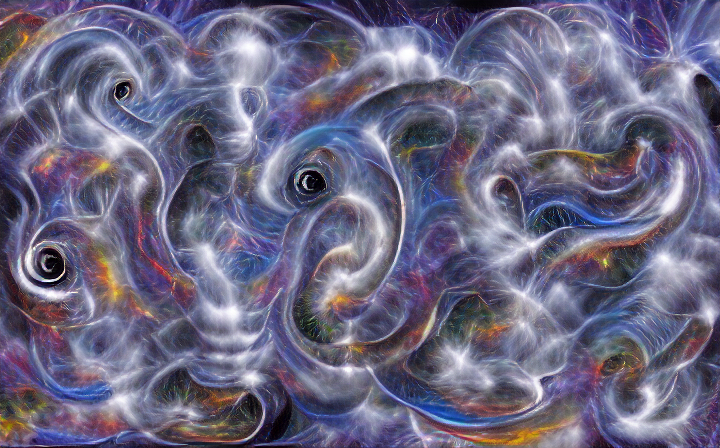

In [39]:
from IPython.display import Image

path_to_image = "images_out/default/default_2.png"
Image(path_to_image)

An interesting start, but mostly it's pretty chaotic. This is because we didn't give PyTTI much opportunity to generate an image for us, and we didn't provide an `init_image` as a starting place. Without an `init_image` the process defaults to initializing from random noise. This isn't necessarily a bad thing, but because we didn't give PyTTI time to do its thing, we mostly got random noise back out. Let's let it run a bit longer, say `steps_per_scene: 500` (the default was 100). 

To better understand how the step number affects the image, we'll tell PyTTI to show us the current state of the image periodically with `display_every: 50`: we're generating for 500 steps, so checking progress every 50 steps let's us see check in on our progress at 10% increments, which feels about right.

Also, that whole "default" namespace thing was confusing, so let's specify a namespace too. Going forward, I'll set the `file_namespace` to the same name as my config file to make it clearer how things group together.

In [40]:
%%writefile config/conf/my_first_pytti_art.yaml
# @package _global_
scenes: The swirling cloud of the wormhole is a metaphor for the inner workings of the mind.

steps_per_scene: 500
save_every: 50
display_every: 50

file_namespace: my_first_pytti_art
seed: 123

Overwriting config/conf/my_first_pytti_art.yaml


In [41]:
%%capture
!python -m pytti.workhorse conf=my_first_pytti_art
# just under 3 min on RTX 3090

Let's see what we got!

50 steps

![50 steps](./images_out/my_first_pytti_art/my_first_pytti_art_1.png)

100 steps

![100 steps](./images_out/my_first_pytti_art/my_first_pytti_art_2.png)

150 steps

![150 steps](./images_out/my_first_pytti_art/my_first_pytti_art_3.png)

200 steps

![200 steps](./images_out/my_first_pytti_art/my_first_pytti_art_4.png)

250 steps

![250 steps](./images_out/my_first_pytti_art/my_first_pytti_art_5.png)

300 steps

![300 steps](./images_out/my_first_pytti_art/my_first_pytti_art_6.png)

350 steps

![350 steps](./images_out/my_first_pytti_art/my_first_pytti_art_7.png)

400 steps

![400 steps](./images_out/my_first_pytti_art/my_first_pytti_art_8.png)

450 steps

![450 steps](./images_out/my_first_pytti_art/my_first_pytti_art_9.png)

500 steps

![500 steps](./images_out/my_first_pytti_art/my_first_pytti_art_10.png)


Great! We have... a trippy image! It looks like the image generation process stabilized around the 6th image there. Each image was 50 steps, so let's reduce `steps_per_scene` to `300`, which will give us outputs a bit faster.

I'm digging the random clouds, but I'm not seeing as much "swirling" as I'd like. Let's see what happens if instead of one big chunk of text, we break our prompt up into several smaller prompts. 

just to make it a little easier to compare experiments, I'll add a "2" to the config filename and also to the file_namespace.

In [42]:
%%writefile config/conf/my_first_pytti_art2.yaml
# @package _global_
scenes: swirling clouds | swirling wormhole | inner workings of the mind

steps_per_scene: 300
save_every: 300

file_namespace: my_first_pytti_art2
seed: 123

Writing config/conf/my_first_pytti_art2.yaml


In [43]:
%%capture
!python -m pytti.workhorse conf=my_first_pytti_art2
# 1m44s

Let's compare the same step from those two runs and see the difference:

![Single long prompt](./images_out/my_first_pytti_art/my_first_pytti_art_10.png "Single long prompt")
![Several short prompts](./images_out/my_first_pytti_art2/my_first_pytti_art2_1.png "Several short prompts")

OK, similar but different. Let's see if we can get those clouds back by adding some weight to just that prompt. The default weight is 1: let's try trippling the influence of "swirling clouds" on our image by applying a weight of 3.

In [44]:
%%writefile config/conf/my_first_pytti_art3.yaml
# @package _global_
scenes: swirling clouds:2 | swirling wormhole | inner workings of the mind

steps_per_scene: 300
save_every: 300

file_namespace: my_first_pytti_art3
seed: 123

Writing config/conf/my_first_pytti_art3.yaml


In [45]:
%%capture
!python -m pytti.workhorse conf=my_first_pytti_art3
# 1m44s

![Single long prompt](./images_out/my_first_pytti_art/my_first_pytti_art_10.png "Single long prompt")
![Several short prompts](./images_out/my_first_pytti_art2/my_first_pytti_art2_1.png "Several short prompts")
![Added weight to clouds](./images_out/my_first_pytti_art3/my_first_pytti_art3_1.png "Added weight to clouds")

Very different! I like it. 

I'm curious how our choice of VQGAN and CLIP model(s) affects this image. To experiment, I'm going to use the "multirun" feature of the CLI, which PyTTI adopts from hydra. You can learn more about how hydra works here: https://hydra.cc/docs/intro/

Here's how this will work: I'm going to create a subfolder under `config/` which I can name whatever I want, as long as it doesn't collide with a name we're already using for settings. I'd like it to be moderately descriptive, so I'll call it `perceptors` for the CLIP model settings. Inside this folder, I'll add a separate config file for each set of parameters I wanna try. In my experiment config, I can now add a `perceptors: ___` argument to specify which set of parameters I want to use.

Let's separately try each CLIP model against the parameters we're currently using. We can also use multiple CLIP models together, so we'll experiment with a few pairs of models as well.

I'm going to illustrate how you could use python to automate generating those config files. Don't let the code here intimidate you: it's not necessary, and frankly this is something you could probably achieve just as quickly by creating the files manually.

In [48]:
!mkdir -p config/perceptors

fpath = "config/perceptors/"

from pytti.Notebook import SUPPORTED_CLIP_MODELS

file_template_header = "# @package _global_\n"

conf_fnames = []

# Write a config file for each CLIP model
for clip_model_name in SUPPORTED_CLIP_MODELS:
    if clip_model_name == "ViTB32": # we've already seen this one
        continue

    conf_str = file_template_header 
    conf_str += "ViTB32: false\n" # turn off the default model
    conf_str += f"{clip_model_name}: true\n"

    fname = f"{clip_model_name}"
    conf_fnames.append(fname)
    with open(f"{fpath}{fname}.yaml", 'w') as f:
        f.write(conf_str)

# try a few multi-clip runs adding different ResNet CLIP models to our default ViT CLIP model
for i, clip_model_name in enumerate(SUPPORTED_CLIP_MODELS):
    if not clip_model_name.startswith('R'):
        continue
    # we don't want to turn off the default model this time, we're just adding additional models
    conf_str = file_template_header
    conf_str += f"{clip_model_name}: true\n"
    
    fname = f"ViTB32_{clip_model_name}"
    conf_fnames.append(fname)
    with open(f"{fpath}{fname}.yaml", 'w') as f:
        f.write(conf_str)
    
    if i >=2:
        break

print(','.join(conf_fnames))

RN50,RN101,RN50x4,RN50x16,RN50x64,ViTB16,ViTL14,ViTB32_RN50,ViTB32_RN101,ViTB32_RN50x4


Now for this to work, we need to make some small changes to how we invoke the CLI:

1. Because we're going to be sweeping over parameters, we need to add the `--multirun` argument to the command line.
2. If `perceptors` was a setting that already appeared in `default.yaml` or `my_first_pytti_art3.yaml`, we could override it by just adding `perceptors=...` to our command. However, because this "setting" doesn't appear in either of those files, there's nothing to override and hydra will throw an error. So instead of "overriding" the nonexistent parameter, we need to "concatenate" it to our configuration by adding a `+` in front of it, i.e. `+perceptors=...`

Considering this is just a tutorial, we're only going to do a handful of different CLIP/VQGAN model combinations. But hopefully you get the idea how you could significantly expand experiments like this.

In [53]:
#%%capture
!python -m pytti.workhorse \
    --multirun \
    conf=my_first_pytti_art3 \
    vqgan_model=sflckr,imagenet,coco \
    +perceptors=RN50x4,ViTB16,ViTB32_RN50x4

# 9 runs is plenty. this is just a tutorial. Changing it to the following would result in 50 runs (5*10):
#    vqgan_model=sflckr,imagenet,coco,wikiart,openimages \
#    +perceptors=RN50,RN101,RN50x4,RN50x16,RN50x64,ViTB16,ViTL14,ViTB32_RN50,ViTB32_RN101,ViTB32_RN50x4

2022-03-04 15:24:05.842 | DEBUG    | pytti.warmup:<module>:13 - /home/dmarx/miniconda3/envs/sandbox/lib/python3.9/site-packages/pytti
2022-03-04 15:24:05.842 | DEBUG    | pytti.warmup:<module>:27 - /home/dmarx/miniconda3/envs/sandbox/lib/python3.9/site-packages/pytti
2022-03-04 15:24:05.843 | DEBUG    | pytti.warmup:ensure_configs_exist:43 - Local config directory detected.
2022-03-04 15:24:07.347 | INFO     | __main__:<module>:30 - Loading pytti...
2022-03-04 15:24:07.435 | DEBUG    | pytti.Notebook:<module>:238 - {'RN50': 'RN50', 'RN101': 'RN101', 'RN50x4': 'RN50x4', 'RN50x16': 'RN50x16', 'RN50x64': 'RN50x64', 'ViTB32': 'ViT-B/32', 'ViTB16': 'ViT-B/16', 'ViTL14': 'ViT-L/14'}
2022-03-04 15:24:08.532 | DEBUG    | pytti.LossAug.OpticalFlowLossClass:<module>:32 - using importlib.resources.files
2022-03-04 15:24:09.020 | INFO     | __main__:<module>:66 - pytti loaded.
2022-03-04 15:24:09.020 | DEBUG    | __main__:<module>:70 - ['/home/dmarx/proj/pytti-book', '/home/dmarx/miniconda3/envs/s

Hydra is... funny. It's very useful for a lot of stuff, but it's sort of too helpful for some of the things we're doing. Specifically, if we downloaded any new models as part of that multirun, hydra noticed that we tried to save that model locally and saved a copy of its own in a sudirectory of `multirun`. So let's just go ahead and delete that whole directory for now.

In [54]:
!rm -r multirun

Allright, with that taken care of, let's take a look at our results!

sflckr, ViTB32 (what we had before, not part of the multirun)

![](./images_out/my_first_pytti_art3/my_first_pytti_art3_1.png)

sflckr , RN50x4

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(1)_1.png)

sflckr , ViTB16

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(2)_1.png)

sflckr , ViTB32_RN50x4

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(3)_1.png)

imagenet, RN50x4

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(4)_1.png)

imagenet, ViTB16

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(5)_1.png)

imagenet, ViTB32_RN50x4

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(6)_1.png)

coco , RN50x4

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(7)_1.png)

coco, ViTB16

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(8)_1.png)

coco, ViTB32_RN50x4

![](./images_out/my_first_pytti_art3/my_first_pytti_art3(9)_1.png)

As you can see, changing either the image model or the CLIP model can have a big impact, and may require retuning paramters you had previously tuned for better results.